In [1]:
import pandas as pd
import numpy as np
import plotly as pl
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [2]:
# Импортирование CSV
df = pd.read_csv('student-mat.csv', sep = ',') # DataFrame
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


О наборе данных
=========
# Контекст:
Данные были получены в ходе опроса учащихся курсов математики и португальского языка в средней школе. Он содержит много интересной социальной, гендерной и учебной информации о студентах.

# Содержание:
Атрибуты для наборов данных Student-mat.csv (курс математики) и Student-por.csv (курс португальского языка):
```
school - школа ученика (двоичный код: 'GP' - Габриэль Перейра или 'MS' - Мусиньо да Силвейра)
sex — пол студента (двоичный код: «Ж» — женский или «М» — мужской)
age - возраст ученика (числовой: от 15 до 22)
address - тип домашнего адреса студента (двоичный: 'U' - городской или 'R' - сельский)
famsize — размер семейства (двоичный: «LE3» — меньше или равно 3 или «GT3» — больше 3)
Pstatus — статус совместного проживания родителей (двоичный код: «Т» — проживание вместе или «А» — раздельно)
Medu — образование матери (числовое: 0 — нет, 1 — начальное образование (4 класс), 2 — с 5 по 9 классы, 3 — среднее образование или 4 — высшее образование)
Fedu — образование отца (числовое: 0 — нет, 1 — начальное образование (4 класс), 2 — с 5 по 9 классы, 3 — среднее образование или 4 — высшее образование)
Mjob - работа матери (номинал: «учитель», «связанный со здравоохранением», гражданские «службы» (например, административные или полицейские), «на дому» или «другое»)
Fjob - работа отца (номинал: «учитель», «связанный со здравоохранением», гражданские «службы» (например, административные или полицейские), «на дому» или «другое»)
reason - причина выбрать эту школу (номинал: близок к «дому», «репутация» школы, предпочтение «курса» или «другое»)
guardian - опекун ученика (номинальное: «мать», «отец» или «другой»)
traveltime — время в пути домой в школу (числовое: 1 – <15 минут, 2 – 15 – 30 минут, 3 – 30 минут до 1 часа или 4 – >1 часа)
Studytime — еженедельное время обучения (числовое: 1 — <2 часов, 2 — 2–5 часов, 3 — 5–10 часов или 4 — >10 часов)
failures - количество прошлых сбоев класса (числовое: n, если 1<=n<3, иначе 4)
schoolup - дополнительная образовательная поддержка (двоичный код: да или нет)
famsup — образовательная поддержка семьи (двоичный код: да или нет)
paid — дополнительные платные занятия по предмету курса (математика или португальский язык) (двоичный код: да или нет)
activities – внеклассные мероприятия (бинарный вариант: да или нет)
nursery - посещал детский сад (двоичный вариант: да или нет)
higher – хочет получить высшее образование (двоичный вариант: да или нет)
Internet — доступ в Интернет дома (двоичный код: да или нет)
romantic – с романтическими отношениями (бинарный: да или нет)
famrel - качество семейных отношений (числовое: от 1 - очень плохо до 5 - отлично)
freetime – свободное время после школы (числовое: от 1 – очень низкое до 5 – очень высокое)
goout – встреча с друзьями (числовое: от 1 – очень низкий до 5 – очень высокий)
Dalc - потребление алкоголя в течение рабочего дня (числовое: от 1 - очень низкое до 5 - очень высокое)
Walc – потребление алкоголя в выходные дни (числовое: от 1 – очень низкое до 5 – очень высокое)
health – текущее состояние здоровья (числовое: от 1 – очень плохое до 5 – очень хорошее)
absences - количество пропусков в школе (числовое: от 0 до 93)
```

Эти оценки связаны с предметом курса (математика или португальский язык):
```
G1 – оценка первого периода (числовая: от 0 до 20)
G2 – оценка за второй период (числовая: от 0 до 20)
G3 — итоговая оценка (числовая: от 0 до 20, выходная цель)
Дополнительное примечание: есть несколько (382) студентов, принадлежащих к обоим наборам данных.
Этих учащихся можно идентифицировать путем поиска идентичных атрибутов, характеризующих каждого учащегося, как показано в прилагаемом файле R.
```


Для чего датасет
====
Датасет "Student Alcohol Consumption" содержит информацию о студентах и в частности о потреблении ими алкоголя. Этот датасет может быть полезен для различных анализов и исследований в области образования и здоровья студентов. Вот несколько причин, почему этот датасет может быть полезным:

    Изучение факторов, влияющих на успеваемость студентов: Вы можете использовать этот датасет, чтобы выяснить, как различные факторы, такие как уровень образования родителей, время, проведенное за учебой, и потребление алкоголя, влияют на успеваемость студентов.

    Анализ влияния здоровья и потребления алкоголя: Датасет включает информацию о здоровье студентов и их потреблении алкоголя. Это может быть полезно для изучения связи между здоровьем и образом жизни студентов.

    Разработка стратегий для улучшения образования: Исследование этого датасета может помочь школам и учебным заведениям разработать стратегии для улучшения успеваемости студентов и их общего благосостояния.

    Предсказание успеваемости студентов: На основе данных о студентах можно попытаться разработать модель для предсказания их будущей успеваемости.

    Анализ социальных и гендерных аспектов образования: Датасет также включает информацию о социальных и гендерных характеристиках студентов, что позволяет изучать социальные тенденции в образовании.

В датасете содержатся различные числовые и категориальные признаки, которые могут быть использованы для проведения анализа и построения моделей машинного обучения. Исследование этого датасета может принести пользу как образовательным учреждениям, так и исследователям в области образования и здоровья.

In [3]:
# Гистограмма возраста студентов
fig = px.histogram(df, x="age", nbins=15, color_discrete_sequence = ['darkorange'], title="Гистограмма возраста студентов")

# Настройка параметров сетки и разделения для оси x
fig.update_xaxes(
    title="Возраст",
    showgrid=True,  # Отображать линии сетки для оси x
    gridcolor="lightgray",  # Цвет линий сетки
    showline=True,  # Отображать линию оси x
    linewidth=2,  # Толщина линии оси x
    mirror=True  # Отобразить линию оси x внутри графика
)

# Настройка параметров сетки и разделения для оси y
fig.update_yaxes(
    title="Количество студентов",
    showgrid=True,  # Отображать линии сетки для оси y
    gridcolor="lightgray",  # Цвет линий сетки
    showline=True,  # Отображать линию оси y
    linewidth=2,  # Толщина линии оси y
    mirror=True  # Отобразить линию оси y внутри графика
)

# Убераем легенду
fig.update_layout(showlegend=False)

# Отображаем гистограмму
fig.show()

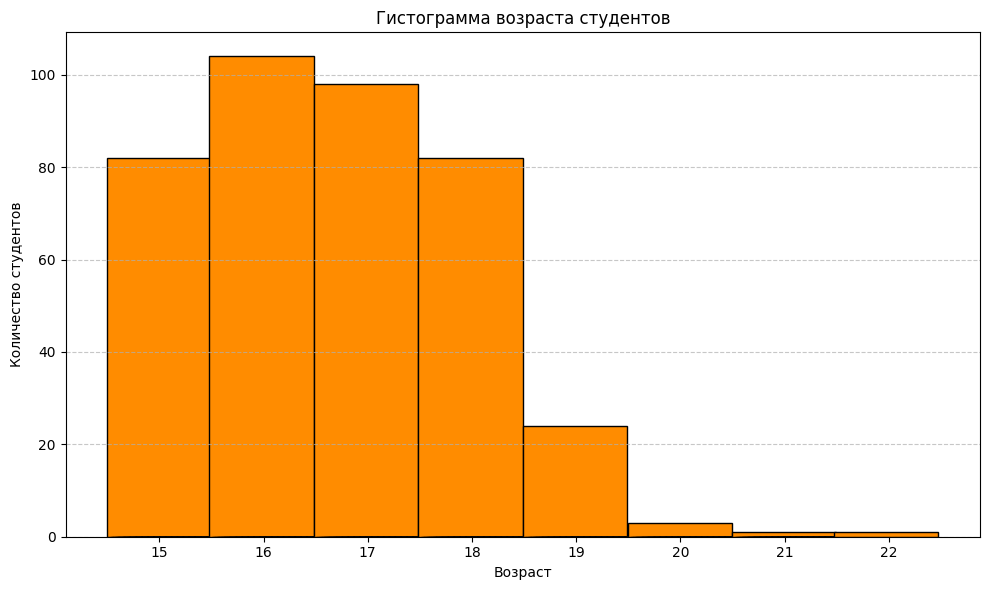

In [4]:
# Расчет гистограммы
hist, bins = np.histogram(df['age'], bins=300)

# Создаем график
plt.figure(figsize=(10, 6))
plt.bar(bins[:-1], hist, width=1.0, color='darkorange', edgecolor='black')

plt.title("Гистограмма возраста студентов")
plt.xlabel("Возраст")
plt.ylabel("Количество студентов")

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

    Расчет гистограммы: Этот шаг начинается с вычисления гистограммы для столбца 'age' в DataFrame df. Гистограмма разбивается на 300 бинов (или интервалов). Функция np.histogram() возвращает два массива: hist (количество значений в каждом бине) и bins (границы бинов).

    Создание графика: Создается объект графика с помощью plt.figure(figsize=(10, 6)). Указанная фигура имеет размер 10x6 дюймов.

    Построение столбцов: С помощью plt.bar(bins[:-1], hist, width=1.0, color='darkorange', edgecolor='black') строится гистограмма, используя массив bins[:-1] для указания начальных точек каждого бина, hist для указания высоты каждого столбца, width=1.0 для задания ширины столбцов, color='darkorange' для цвета столбцов и edgecolor='black' для цвета границ столбцов.

    Добавление заголовка и меток осей: С помощью plt.title(), plt.xlabel(), и plt.ylabel() добавляется заголовок и метки к осям x и y.

    Добавление сетки: plt.grid(axis='y', linestyle='--', alpha=0.7) добавляет сетку для оси y с пунктирными линиями (linestyle='--') и некоторой прозрачностью (alpha=0.7).

    Подгонка макета: plt.tight_layout() выполняет автоматическую настройку макета графика, чтобы убедиться, что все элементы отображаются правильно.

    Отображение графика: plt.show() отображает построенную гистограмму.

In [5]:
# Построение Box plot для столбца "absences"
fig = px.box(df, y="absences", color_discrete_sequence = ['darkorange'], title="Распределение количества пропусков занятий")

# Настройка параметров сетки и разделения для оси y
fig.update_yaxes(
    title="Количество пропусков",
    showgrid=True,  # Отображать линии сетки для оси y
    gridcolor="lightgray",  # Цвет линий сетки
    showline=True,  # Отображать линию оси y
    linewidth=2,  # Толщина линии оси y
    mirror=True  # Отобразить линию оси y внутри графика
)

# Убераем легенду
fig.update_layout(showlegend=False)

# Отображаем Box plot
fig.show()


    Ящик: Вертикальная линия в середине ящика представляет медиану количества пропусков. Это значение будет показывать, сколько пропусков было в среднем у студентов.

    Усы: Усы будут указывать на минимальное и максимальное количество пропусков в данных студентов, исключая выбросы.

    Выбросы: Точки за пределами усов могут представлять собой студентов, у которых было необычно много или слишком мало пропусков, то есть такие значения, которые существенно отличаются от среднего уровня пропусков.

In [6]:
# Круговая диаграмма пола студентов
gender_counts = df['sex'].value_counts().reset_index()
gender_counts.columns = ['Пол', 'Количество']
fig = px.pie(gender_counts, names='Пол', values='Количество', title="Круговая диаграмма пола студентов")
fig.show()

In [7]:
# Подсчитаем количество каждой профессии
mother_jobs = df['Mjob'].value_counts()
father_jobs = df['Fjob'].value_counts()

# Создаем два круговых сектора для матерей и отцов
fig = go.Figure()

# Добавляем сектор для профессий матерей
fig.add_trace(go.Pie(
    labels=mother_jobs.index,
    values=mother_jobs.values,
    name="Матери",
    domain={"x": [0, 0.45]}
))

# Добавляем сектор для профессий отцов
fig.add_trace(go.Pie(
    labels=father_jobs.index,
    values=father_jobs.values,
    name="Отцы",
    domain={"x": [0.55, 1]}
))

# Настройка макета и заголовка
fig.update_layout(
    title="Профессии матерей и отцов студентов",
    legend_title="Группа",
    annotations=[{"text": "Матери", "x": 0.2, "y": 0.5, "showarrow": False},
                 {"text": "Отцы", "x": 0.8, "y": 0.5, "showarrow": False}]
)

# Отображаем объединенную круговую диаграмму
fig.show()

In [8]:
# Корреляционная матрица
# Удалить столбцы с текстовыми данными
dfCor = df.select_dtypes(exclude=['object'])

correlation_matrix = dfCor.corr()
fig = px.imshow(correlation_matrix, x=correlation_matrix.columns, y=correlation_matrix.index, title="Корреляционная матрица")
fig.show()

Корреляционная матрица - это таблица, которая отображает коэффициенты корреляции между парами переменных в наборе данных. Коэффициент корреляции измеряет степень линейной зависимости между двумя переменными. Он может принимать значения от -1 до 1:

    Если коэффициент корреляции близок к 1, это означает положительную линейную зависимость: увеличение одной переменной сопровождается увеличением другой переменной.

    Если коэффициент корреляции близок к -1, это означает отрицательную линейную зависимость: увеличение одной переменной сопровождается уменьшением другой переменной.

    Если коэффициент корреляции близок к 0, это означает отсутствие линейной зависимости.